# **EDA ASSIGNMENT**

In [1]:
#Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.

import pandas as pd
df= pd.read_csv('BIKE DETAILS.csv')
df.head(10)


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [2]:
df.shape

(1061, 7)

In [3]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [4]:
#Question 2: Check for missing values in all columns and describe your approach for handling them.

df.isnull()


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...
1056,False,False,False,False,False,False,False
1057,False,False,False,False,False,False,False
1058,False,False,False,False,False,False,False
1059,False,False,False,False,False,False,False


In [5]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


For Q.2 my approach would be like this:
- First, I used the isnull() function to check which columns contained missing values. Then, I summed them up to confirm how many null values each column had.
For example, in the Ex-Showroom Price column, I found 435 null values.
To handle this, I can follow either of these approaches for numerical columns:
Replace the missing values with the mean of that column,
Or remove the rows containing null values if they are not significant to the analysis.

Text(0, 0.5, 'Number of Bikes (Frequency)')

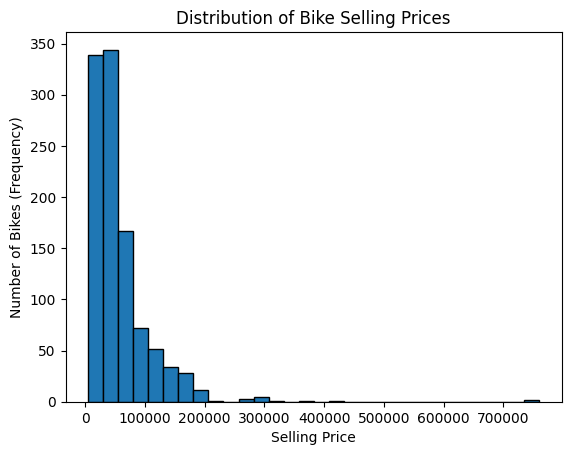

In [6]:
#Q.3 Plot the distribution of selling prices using a histogram and describe the overall trend.

import matplotlib.pyplot as plt
plt.hist(df['selling_price'], bins= 30, edgecolor="black")
plt.title('Distribution of Bike Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Number of Bikes (Frequency)')



The distribution of bike selling prices is strongly right-skewed.

This means that most bikes in the dataset have low selling prices, clustering at the cheaper end. A much smaller number of bikes are sold at high prices, forming a long "tail" to the right of the graph.

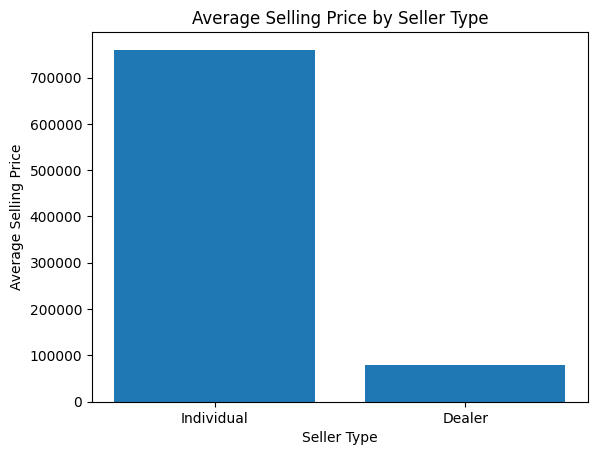

In [7]:
#Create a bar plot to visualize the average selling price for each seller_type and write one observation.

plt.bar(df['seller_type'], df['selling_price'])
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.title('Average Selling Price by Seller Type')
plt.show()

#Observation: Selling Price by the individual is more as compared to Dealer

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


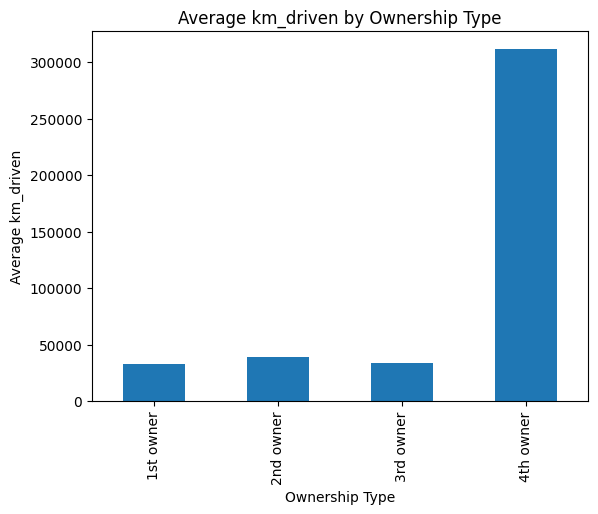

In [8]:
# Question 5: Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.
avg_km_by_owner = df.groupby('owner')['km_driven'].mean()
print(avg_km_by_owner)
avg_km_by_owner.plot(kind='bar')
plt.title('Average km_driven by Ownership Type')
plt.xlabel('Ownership Type')
plt.ylabel('Average km_driven')
plt.show()


In [9]:
#Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.

print("Before Removing Outliers:")
print(df['km_driven'].describe())

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound= Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

print("After Removing Outliers:")
print(df['km_driven'].describe())


Before Removing Outliers:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64
After Removing Outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


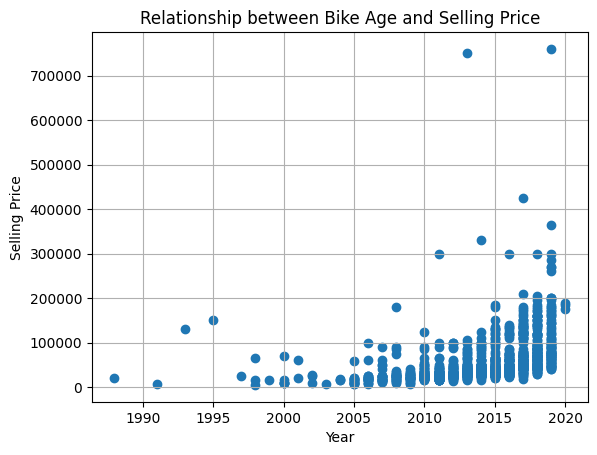

In [10]:
#Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.
plt.scatter(df['year'], df['selling_price'])
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Relationship between Bike Age and Selling Price')
plt.grid(axis="both" )
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1022 entries, 0 to 1059
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1022 non-null   object 
 1   selling_price      1022 non-null   int64  
 2   year               1022 non-null   int64  
 3   seller_type        1022 non-null   object 
 4   owner              1022 non-null   object 
 5   km_driven          1022 non-null   int64  
 6   ex_showroom_price  607 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 63.9+ KB


In [31]:
#Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.

df_encoded= pd.get_dummies(df, columns=['seller_type'])
df_encoded.head()

,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_type_Dealer,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,NaN,False,True
1,Honda Dio,45000,2017,1st owner,5650,NaN,False,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,False,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,False,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,NaN,False,True


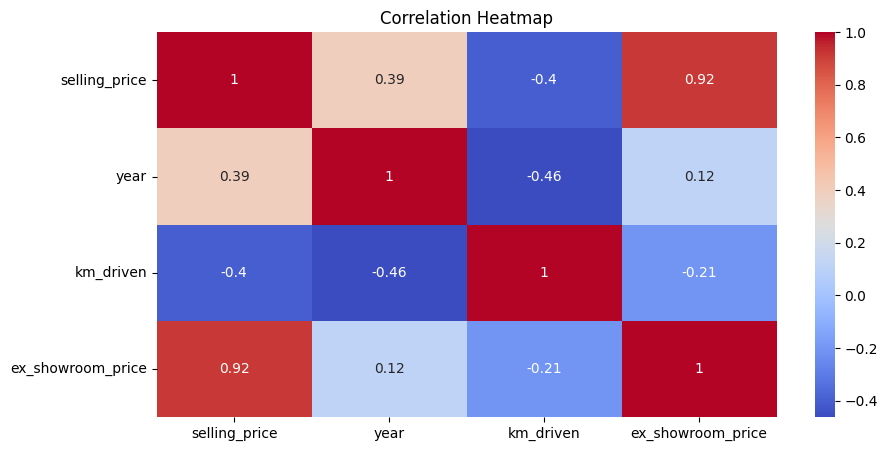

In [30]:
#Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?
import seaborn as sns
numeric_cols= df.select_dtypes(include=['int64','float64'])
corr_matrix= numeric_cols.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#Q.10 **Summarize your findings in a brief report:**
 **What are the most important factors affecting a bike's selling price?**

 **Mention any data cleaning or feature engineering you performed.**

- Based on the data, the **original ex-showroom price** is by far the most important factor in a bike's resale value, followed by its **age** (newer bikes sell for more). How many kilometers it's been driven has a surprisingly small effect. As for data prep, I didn't have to do any special cleaning or feature engineering; I  just ran the analysis directly on the numeric columns in your file.